# **An introduction to YOLO v8 <p>**

This notebook walks you through a few lines of code to help explore YOLO v8 for object detection and instance segmentation using pre-trained weights. More information about YOLO v8 can be found here.

https://docs.ultralytics.com/models/yolov8/#key-features


In [1]:
# Install the ultralytics package using pip
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.6/911.6 kB 23.0 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Load the model. Here, we will load both detection and instance models to see the difference in the type of results from these models.

In [3]:
#Detection model
det_model = YOLO('yolov8n.pt')

#Instance model
inst_model = YOLO('yolov8n-seg.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 122MB/s]


100%|██████████| 6.74M/6.74M [00:00<00:00, 122MB/s]


Run inference on an input image using both models.

In [4]:
# Perform object detection on an image using the model
img = '/content/kitchen.png'
detection_results = det_model.predict(img)
instance_results = inst_model.predict(img)



image 1/1 /content/kitchen.png: 384x640 2 bowls, 2 chairs, 5 potted plants, 1 refrigerator, 1 vase, 93.4ms
Speed: 12.2ms preprocess, 93.4ms inference, 809.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/kitchen.png: 384x640 2 bowls, 2 chairs, 6 potted plants, 1 refrigerator, 2 vases, 18.2ms
Speed: 1.9ms preprocess, 18.2ms inference, 15.2ms postprocess per image at shape (1, 3, 384, 640)


Plot the results and compare. Notice how the object detection model gives bounding boxes only whereas the instance segmentation results give both the bounding box and corresponding object pixels.

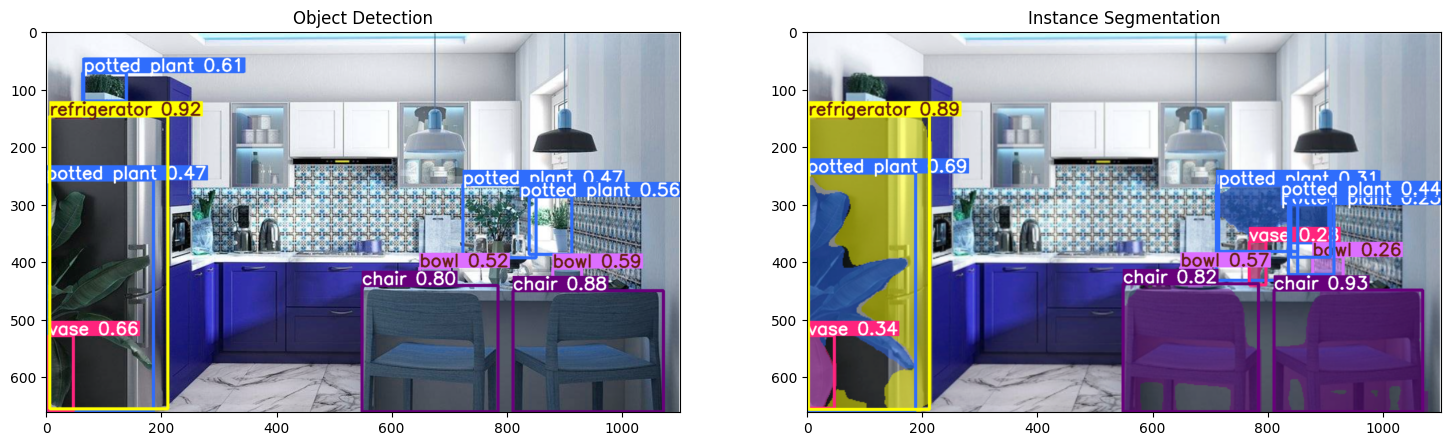

In [5]:
detection_result_array = detection_results[0].plot()
instance_result_array = instance_results[0].plot()
fig = plt.figure(figsize=(18, 9))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Object Detection")
ax1.imshow(detection_result_array)
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Instance Segmentation")
ax2.imshow(instance_result_array)

You can explore the results manually. For example, how many instance results do we have, what is the label and bounding box coordinates for a specific detected object.

In [6]:
#Number of bounding boxes (objects) detected in the image
result = instance_results[0]
len(result.boxes)

13